In [1]:
import time
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as skl
import plotly_express as px
#import missingno as mg
import os


from sklearn.preprocessing      import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection    import train_test_split,cross_val_predict,cross_validate,StratifiedKFold 
from sklearn.pipeline           import Pipeline, make_pipeline
from sklearn.impute             import SimpleImputer
from sklearn.metrics            import mean_absolute_error,mean_squared_error
from sklearn                    import set_config
from sklearn                    import  compose
set_config(display='diagram') # Useful for display the pipeline



In [2]:
df= pd.read_csv('C:\\Users\\ritth\\code\\Strive\\Strive-Exercises\\Chapter 02\\07. Gradient Boosting and Encoding\\kg_data\\train.csv', index_col='Id')
df_test=pd.read_csv('C:\\Users\\ritth\\code\\Strive\\Strive-Exercises\\Chapter 02\\07. Gradient Boosting and Encoding\\kg_data\\test.csv', index_col='Id')

In [3]:
print(f'Train data shape:{df.shape}')
print(f'Test data shape :{df_test.shape}')

Train data shape:(1460, 80)
Test data shape :(1459, 79)


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [5]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [7]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
df_test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

<AxesSubplot:>

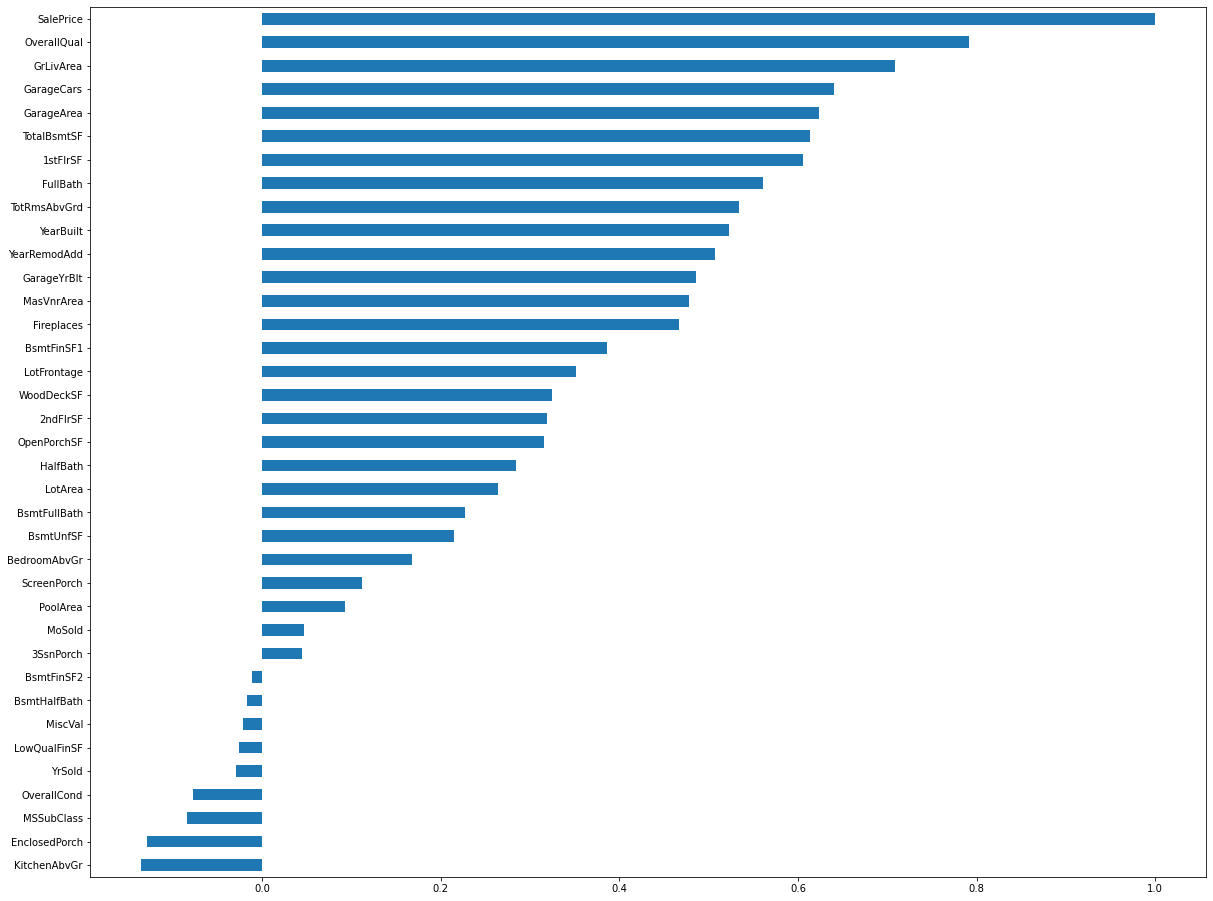

In [9]:
plt.figure(figsize=(20,16))
df.corr()['SalePrice'].sort_values().plot.barh()

<AxesSubplot:>

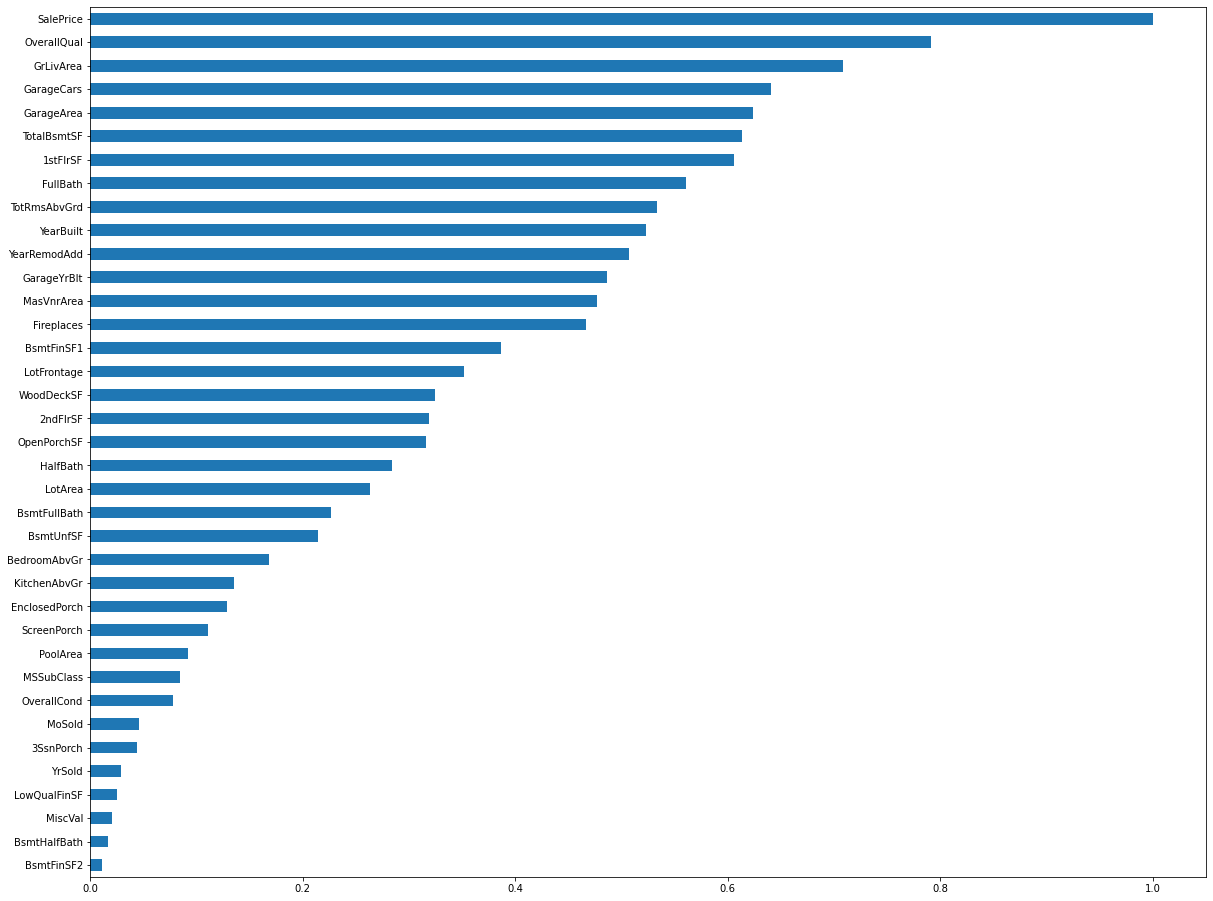

In [10]:
plt.figure(figsize=(20,16))
df.corr()['SalePrice'].abs().sort_values().plot.barh()

C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

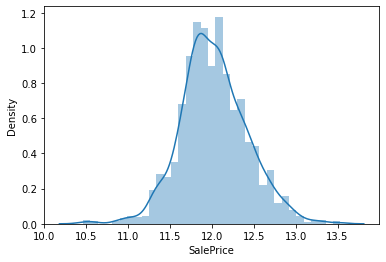

In [11]:
sb.distplot(np.log(df['SalePrice']))

In [12]:
# fig = px.scatter(x = df['LotFrontage'], y= np.log(df['SalePrice']))
# fig.show()

Dropping (PoolQc, Fence, missfeature, Alley, FireplaceQu) because there are alot of information missing from these categories

In [13]:
x=df.drop(columns=
    ['PoolQC', 'Fence','MiscFeature', 'Alley', 'FireplaceQu',
    'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'YrSold','3SsnPorch', 'MoSold', 'SalePrice']
    )

y=df['SalePrice']

In [14]:
print(x.shape)
print(y.shape)

(1460, 68)
(1460,)


In [15]:
x_test=df_test.drop(columns=
    ['PoolQC', 'Fence','MiscFeature', 'Alley', 'FireplaceQu',
    'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'YrSold','3SsnPorch', 'MoSold']   
)

In [16]:
x.select_dtypes('object').nunique

<bound method DataFrame.nunique of      MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                        
1          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
5          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1460       RL   Pave      Reg         Lvl    AllPub    Inside    

In [17]:
cat_vars=x.select_dtypes(include=[object]).columns.values.tolist()

In [18]:
num_vars=x.select_dtypes(exclude=[object]).columns.values.tolist()

In [19]:
num_4_treeModels = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean'))
  ])

cat_4_treeModels= Pipeline(steps=[
  ('imputer,', SimpleImputer( strategy='most_frequent')),
  ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
  ])
  
tree_prepro = compose.ColumnTransformer(transformers=[
  ('num', num_4_treeModels, num_vars),
  ('cat', cat_4_treeModels, cat_vars),
  ], remainder='drop') 
tree_prepro

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                                  '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
                                  'FullBath', 'HalfBath', 'BedroomAbvGr',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fir...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual', ...])])

In [20]:
from sklearn.linear_model   import LinearRegression
from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import RandomForestRegressor
from sklearn.ensemble       import HistGradientBoostingRegressor
from sklearn.ensemble       import ExtraTreesRegressor
from sklearn.ensemble       import AdaBoostRegressor
from sklearn.ensemble       import GradientBoostingRegressor
from xgboost                import XGBRegressor
from lightgbm               import LGBMRegressor
from catboost               import CatBoostRegressor



In [21]:
tree_classifiers = {
  "Linear Model":  LinearRegression(),
  "Decision Tree": DecisionTreeRegressor(random_state=0),
  "Extra Trees":   ExtraTreesRegressor(random_state=0),
  "Random Forest": RandomForestRegressor(random_state=0),
  "AdaBoost":      AdaBoostRegressor(random_state=0),
  "Skl GBM":       GradientBoostingRegressor(random_state=0),
  "Skl HistGBM":   HistGradientBoostingRegressor(random_state=0),
  "XGBoost":       XGBRegressor(),
  "LightGBM":      LGBMRegressor(random_state=0),
  "CatBoost":      CatBoostRegressor(random_seed=0, allow_writing_files=False)
}

tree_classifiers = {name: make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_classifiers["LightGBM"]


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvG...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('lgbmregressor', LGBMRegressor(random_state=0))])

In [22]:


results = pd.DataFrame({'Model': [], 'MSE': [], 'MAE': [], " % error": [], 'Time': []})

x_train, x_val, y_train, y_val = train_test_split(x, y,random_state=0,test_size=0.2)

rang = abs(y_train.max()) + abs(y_train.min())

for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_val)
    
    results = results.append({"Model":    model_name,
                              "MSE": mean_squared_error(y_val, pred),
                              "MAE": mean_absolute_error(y_val, pred),
                              " % error": mean_squared_error(y_val, pred) / rang,
                              "Time":     total_time},
                              ignore_index=True)
### END SOLUTION


results_ord = results.sort_values(by=['MSE'], ascending=True, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['MSE', 'MAE'], vmin=0, vmax=100, color='#5fba7d')

Learning rate set to 0.04196
0:	learn: 76500.2413228	total: 135ms	remaining: 2m 14s
1:	learn: 74563.6602624	total: 140ms	remaining: 1m 9s
2:	learn: 72750.9078066	total: 145ms	remaining: 48.2s
3:	learn: 70914.1602187	total: 149ms	remaining: 37s
4:	learn: 69223.5461674	total: 152ms	remaining: 30.2s
5:	learn: 67515.3372387	total: 155ms	remaining: 25.7s
6:	learn: 65967.3721804	total: 158ms	remaining: 22.4s
7:	learn: 64292.7457190	total: 162ms	remaining: 20.1s
8:	learn: 62832.3006978	total: 165ms	remaining: 18.2s
9:	learn: 61271.9852845	total: 168ms	remaining: 16.6s
10:	learn: 59918.3289767	total: 171ms	remaining: 15.4s
11:	learn: 58581.3063460	total: 175ms	remaining: 14.4s
12:	learn: 57239.8137098	total: 179ms	remaining: 13.6s
13:	learn: 55966.8848953	total: 182ms	remaining: 12.8s
14:	learn: 54833.5905974	total: 185ms	remaining: 12.2s
15:	learn: 53543.0378306	total: 189ms	remaining: 11.6s
16:	learn: 52397.7456101	total: 193ms	remaining: 11.2s
17:	learn: 51389.7284959	total: 197ms	remaining

,Model,MSE,MAE,% error,Time
1,Skl GBM,749596715.467721,16314.473427,948.976725,0.610570
2,CatBoost,844575541.315835,15886.543185,1069.218308,5.427504
3,Skl HistGBM,948972304.509122,16693.198100,1201.382839,1.413174
4,Extra Trees,981649802.999879,17324.433699,1242.751998,1.566976
5,Random Forest,993130068.531238,16930.675925,1257.285819,1.946098
6,LightGBM,997462012.563673,16678.425962,1262.769987,0.216561
7,XGBoost,1102067809.817458,17865.273090,1395.199152,0.379184
8,AdaBoost,1157680654.348321,23940.682200,1465.604069,0.358948
9,Decision Tree,2277668759.445206,28512.897260,2883.490011,0.108092
10,Linear Model,2586664832.188374,23806.334039,3274.673797,0.083145


In [23]:
best_model = tree_classifiers["Skl GBM"]

# Fit best model with all data
best_model.fit(x, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'BsmtFullBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvG...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=0))])

In [24]:
test_pred = best_model.predict(x_test)

In [25]:
sub_kaggle = pd.DataFrame(test_pred, index=x_test.index, columns=["SalePrice"])

In [26]:
sub_kaggle.head()

,SalePrice
Id,
1461,124196.828121
1462,164216.969596
1463,178199.277995
1464,182333.336347
1465,204142.153641


In [27]:
sub_kaggle.to_csv("submission.csv")